In [1]:
import pickle
import numpy as np
import pandas as pd

In [ ]:
# Load the large dataset
with open("data/all_points_may_2024.pkl", "rb") as file:
    all_points = pickle.load(file)

# Explore the structure
print(f"Top-level type: {type(all_points)}")
print(f"Number of patient entries: {len(all_points)}")

# Peek into a few patients
for i, (patient_id, patient_data) in enumerate(all_points.items()):
    print(f"\nPatient {patient_id}")
    print(f"Keys: {list(patient_data.keys())}")
    print(f"SOO: {patient_data.get('SOO')}")
    print(f"Structures available: {list(patient_data.get('Structures', {}).keys())}")
    if i == 2: break  # Print only a few examples

Top-level type: <class 'dict'>
Number of patient entries: 190

Patient P186
Keys: ['Sex', 'HTA', 'Age', 'PVC_transition', 'SOO_chamber', 'Height', 'Weight', 'BMI', 'DM', 'DLP', 'Smoker', 'COPD', 'Sleep_apnea', 'CLINICAL_SCORE', 'SOO', 'OTorigin', 'Structures']
SOO: ['Unión mitroaórtica']
Structures available: ['2-LV', '1-1-ReAO', '1-AO']

Patient P245
Keys: ['Sex', 'HTA', 'Age', 'PVC_transition', 'SOO_chamber', 'Height', 'Weight', 'BMI', 'DM', 'DLP', 'Smoker', 'COPD', 'Sleep_apnea', 'CLINICAL_SCORE', 'SOO', 'OTorigin', 'Structures']
SOO: ['Pared libre anterior']
Structures available: ['2-RV']

Patient P292
Keys: ['Sex', 'HTA', 'Age', 'PVC_transition', 'SOO_chamber', 'Height', 'Weight', 'BMI', 'DM', 'DLP', 'Smoker', 'COPD', 'Sleep_apnea', 'CLINICAL_SCORE', 'SOO', 'OTorigin', 'Structures']
SOO: ['RCC']
Structures available: ['2-AO', '1-PA']


Hence, the dataset contains data for 190 patients.
For each patient:
* Metadata: Sex, HTA, Age, PVC_transition, SOO_chamber, Height, Weight, BMI, DM, DLP, Smoker, COPD, Sleep_apnea, CLINICAL_SCORE, SOO, OTorigin.
* Structures: Labels that represent the different types of ECG measurements that were recorded for the patient.

In [3]:
# Initial inspection of metadata only (one row per patient)
overview_metadata = []
for patient_id, patient_data in all_points.items():
    overview_metadata.append({
        "PatientID": patient_id,
        "Sex": patient_data.get("Sex", [None])[0],
        "Age": patient_data.get("Age", [None])[0],
        "PVC_transition": patient_data.get("PVC_transition", [None])[0],
        "SOO_chamber": patient_data.get("SOO_chamber", [None])[0],
        "Height": patient_data.get("Height", [None])[0],
        "Weight": patient_data.get("Weight", [None])[0],
        "BMI": patient_data.get("BMI", [None])[0],
        "DM": patient_data.get("DM", [None])[0],
        "DLP": patient_data.get("DLP", [None])[0],
        "Smoker": patient_data.get("Smoker", [None])[0],
        "COPD": patient_data.get("COPD", [None])[0],
        "Sleep_apnea": patient_data.get("Sleep_apnea", [None])[0],
        "CLINICAL_SCORE": patient_data.get("CLINICAL_SCORE", [None])[0],
        "SOO": patient_data.get("SOO", [None])[0],
        "OTorigin": patient_data.get("OTorigin", [None])[0],
        "Structures": patient_data.get("Structures", {})
    })

df_meta_overview = pd.DataFrame(overview_metadata)
print("Metadata overview shape (patients):", df_meta_overview.shape)
df_meta_overview.head()

Metadata overview shape (patients): (190, 17)


,PatientID,Sex,Age,PVC_transition,SOO_chamber,Height,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,CLINICAL_SCORE,SOO,OTorigin,Structures
0,P186,Female,61.0,V1,Right ventricle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unión mitroaórtica,0.0,{'2-LV': {'P36': {'I': [-0.075 -0.075 -0.072 ....
1,P245,Female,52.0,V3,RVOT,169.0,68.0,NaN,No,No,No,No,No,1.0,Pared libre anterior,1.0,{'2-RV': {'P157': {'I': [ 0. 0. 0. ...
2,P292,Female,69.0,V3,LVOT,156.0,70.0,NaN,No,Yes,No,No,No,1.0,RCC,1.0,{'2-AO': {'P55': {'I': [-0.063 -0.051 -0.03 ....
3,P205,Female,66.0,V4,Right ventricle,176.0,63.0,20.338326,No,No,No,No,No,1.0,M. papilar posteromedial,0.0,{'2-1-Rp-LV': {'P320': {'I': [-0.297 -0.288 -0...
4,P066,Female,46.0,V3,RVOT,160.0,79.0,30.859375,No,No,No,No,No,1.0,RVOT septal,1.0,{'1-PA': {'P13': {'I': [-0.006 -0.003 -0.003 ....


In [4]:
# Check the structure of the first patient
df_meta_overview["Structures"][0]

{'2-LV': {'P36': {'I': array([-0.075, -0.075, -0.072, ..., -0.039, -0.039, -0.036]),
   'II': array([-0.045, -0.048, -0.048, ...,  0.09 ,  0.09 ,  0.087]),
   'III': array([0.03 , 0.027, 0.024, ..., 0.132, 0.129, 0.123]),
   'AVR': array([-0.051, -0.051, -0.048, ..., -0.087, -0.084, -0.078]),
   'AVL': array([ 0.06 ,  0.06 ,  0.06 , ..., -0.024, -0.024, -0.024]),
   'AVF': array([-0.006, -0.009, -0.009, ...,  0.111,  0.108,  0.105]),
   'V1': array([0.093, 0.093, 0.09 , ..., 0.021, 0.021, 0.018]),
   'V2': array([ 0.078,  0.075,  0.075, ..., -0.006, -0.006, -0.006]),
   'V3': array([0.078, 0.078, 0.075, ..., 0.129, 0.126, 0.126]),
   'V4': array([0.024, 0.024, 0.021, ..., 0.117, 0.117, 0.114]),
   'V5': array([-0.024, -0.027, -0.03 , ...,  0.093,  0.093,  0.09 ]),
   'V6': array([-0.054, -0.054, -0.057, ...,  0.063,  0.063,  0.063])},
  'P122': {'I': array([-0.042, -0.045, -0.048, ..., -0.078, -0.072, -0.072]),
   'II': array([-0.015, -0.015, -0.012, ...,  0.117,  0.12 ,  0.12 ]),
   '

Hence, the Structures field is a dictionary where:
- Outer dictionary keys represnt anatomical regions or structures: (e.g., '2-LV', '1-AO')
- Each anatomical regions has patient IDs (e.g., 'P36', 'P122') as keys
- The patient IDs have dictionaries containing ECG leads (e.g., 'I', 'II', etc.), each associated with an array of ECG signal values.

Note that, even though we are printing the structure information for the first patient in the dataset (in this case, patient P186), we are seeing other patients' ECG data for the same anatomical structure (e.g., '2-LV' for 'P36', 'P122', etc.).

In [5]:
signal_records = []

for patient_id, patient_data in all_points.items():
    structures = patient_data.get("Structures")
    
    # Skip if Structures is None
    if not isinstance(structures, dict):
        continue
    
    for structure, signals in structures.items():
        for sample_id, leads in signals.items():
            if set(leads.keys()) >= {'I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'}:
                signal_records.append({
                    "PatientID": patient_id,
                    "SampleID": sample_id,
                    "Structure": structure,
                    "Leads": leads,
                    "Sex": patient_data.get("Sex", [None])[0],
                    "Age": patient_data.get("Age", [None])[0],
                    "PVC_transition": patient_data.get("PVC_transition", [None])[0],
                    "SOO_chamber": patient_data.get("SOO_chamber", [None])[0],
                    "Height": patient_data.get("Height", [None])[0],
                    "Weight": patient_data.get("Weight", [None])[0],
                    "BMI": patient_data.get("BMI", [None])[0],
                    "DM": patient_data.get("DM", [None])[0],
                    "DLP": patient_data.get("DLP", [None])[0],
                    "Smoker": patient_data.get("Smoker", [None])[0],
                    "COPD": patient_data.get("COPD", [None])[0],
                    "Sleep_apnea": patient_data.get("Sleep_apnea", [None])[0],
                    "CLINICAL_SCORE": patient_data.get("CLINICAL_SCORE", [None])[0],
                    "SOO": patient_data.get("SOO", [None])[0],
                    "OTorigin": patient_data.get("OTorigin", [None])[0]
                })

df_signals = pd.DataFrame(signal_records)
print("Signal-level DataFrame shape:", df_signals.shape)
df_signals.head()

Signal-level DataFrame shape: (29153, 19)


,PatientID,SampleID,Structure,Leads,Sex,Age,PVC_transition,SOO_chamber,Height,Weight,BMI,DM,DLP,Smoker,COPD,Sleep_apnea,CLINICAL_SCORE,SOO,OTorigin
0,P186,P36,2-LV,"{'I': [-0.075, -0.075, -0.07200000000000001, -...",Female,61.0,V1,Right ventricle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unión mitroaórtica,0.0
1,P186,P122,2-LV,"{'I': [-0.042, -0.045, -0.048, -0.048, -0.048,...",Female,61.0,V1,Right ventricle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unión mitroaórtica,0.0
2,P186,P85,2-LV,"{'I': [-0.048, -0.045, -0.042, -0.042, -0.042,...",Female,61.0,V1,Right ventricle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unión mitroaórtica,0.0
3,P186,P103,2-LV,"{'I': [-0.045, -0.048, -0.048, -0.048, -0.045,...",Female,61.0,V1,Right ventricle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unión mitroaórtica,0.0
4,P186,P86,2-LV,"{'I': [0.003, 0.009000000000000001, 0.015, 0.0...",Female,61.0,V1,Right ventricle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unión mitroaórtica,0.0


In [6]:
df_signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29153 entries, 0 to 29152
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientID       29153 non-null  object 
 1   SampleID        29153 non-null  object 
 2   Structure       29153 non-null  object 
 3   Leads           29153 non-null  object 
 4   Sex             28702 non-null  object 
 5   Age             28635 non-null  float64
 6   PVC_transition  27610 non-null  object 
 7   SOO_chamber     29153 non-null  object 
 8   Height          22667 non-null  float64
 9   Weight          22485 non-null  float64
 10  BMI             14678 non-null  float64
 11  DM              26410 non-null  object 
 12  DLP             26700 non-null  object 
 13  Smoker          26258 non-null  object 
 14  COPD            26548 non-null  object 
 15  Sleep_apnea     26258 non-null  object 
 16  CLINICAL_SCORE  26677 non-null  float64
 17  SOO             29081 non-null 

In [7]:
# Drop columns with more than 40% missing values
threshold = 0.4  # 40%
missing_ratios = df_signals.isnull().mean()

# Keep only columns below the threshold
columns_to_keep = missing_ratios[missing_ratios < threshold].index.tolist()
df_signals = df_signals[columns_to_keep]

print("Remaining columns after dropping those with >40% missing values:")
print(df_signals.columns)

Remaining columns after dropping those with >40% missing values:
Index(['PatientID', 'SampleID', 'Structure', 'Leads', 'Sex', 'Age',
       'PVC_transition', 'SOO_chamber', 'Height', 'Weight', 'DM', 'DLP',
       'Smoker', 'COPD', 'Sleep_apnea', 'CLINICAL_SCORE', 'SOO', 'OTorigin'],
      dtype='object')


In [8]:
# Define types of columns
numeric_cols = ['Age', 'Height', 'Weight', 'CLINICAL_SCORE', 'OTorigin']
categorical_cols = ['Sex', 'PVC_transition', 'SOO_chamber', 'DM', 'DLP', 'Smoker', 'COPD', 'Sleep_apnea', 'SOO']

# Impute numerical columns with median
df_signals[numeric_cols] = df_signals[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Impute categorical columns with mode
df_signals[categorical_cols] = df_signals[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Check again for missing values
print("\nRemaining missing values after imputation:")
print(df_signals.isnull().sum())


Remaining missing values after imputation:
PatientID         0
SampleID          0
Structure         0
Leads             0
Sex               0
Age               0
PVC_transition    0
SOO_chamber       0
Height            0
Weight            0
DM                0
DLP               0
Smoker            0
COPD              0
Sleep_apnea       0
CLINICAL_SCORE    0
SOO               0
OTorigin          0
dtype: int64


In [9]:
import scipy.signal as sp
from scipy.interpolate import interp1d

# Preprocess a multi-lead ECG signal (resampling, bandpass filtering)
def preprocess_ecg_signal(ecg_signals, fs=1000, target_fs=250, high=0.5, low=100.0):
    """
    Preprocess a multi-lead ECG signal [timepoints, leads]:
    - Resample to target_fs
    - Bandpass filter between `high` and `low`
    """
    timepoints = ecg_signals.shape[0]  # Originally 2500 samples (assuming 1000Hz)
    new_timepoints = int(timepoints * target_fs / fs)  # Resample to 625 samples (for 250Hz)
    
    # Resample each lead using interpolation
    ecg_resampled = np.zeros((new_timepoints, ecg_signals.shape[1]))
    for lead in range(ecg_signals.shape[1]):
        f = interp1d(np.arange(timepoints), ecg_signals[:, lead])  # Interpolation function from original points
        ecg_resampled[:, lead] = f(np.linspace(0, timepoints - 1, new_timepoints))  # Create the new timeline

    # Apply high-pass filter (remove slow drifts below 0.5 Hz)
    b_high, a_high = sp.butter(2, high / (target_fs / 2), btype='high')
    ecg_filtered = sp.filtfilt(b_high, a_high, ecg_resampled, axis=0)

    # Apply low-pass filter (remove noise above 100 Hz)
    b_low, a_low = sp.butter(2, low / (target_fs / 2), btype='low')
    ecg_filtered = sp.filtfilt(b_low, a_low, ecg_filtered, axis=0)

    return ecg_filtered  # Return the signal with shape [625, 12]

# Apply preprocessing to the signals in df_signals
preprocessed_ecgs = []
for i, row in df_signals.iterrows():
    leads = row['Leads']
    # Get ECG signal (12 leads per sample)
    ecg_signals = np.array([leads[lead] for lead in ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']]).T
    processed_ecg = preprocess_ecg_signal(ecg_signals)
    preprocessed_ecgs.append(processed_ecg)

# Try stacking into a 3D array: [samples, timepoints, leads]
try:
    preprocessed_ecgs = np.stack(preprocessed_ecgs)
    print("All signals successfully preprocessed to shape:", preprocessed_ecgs.shape)
except ValueError:
    print("Signals have different lengths. Stored as a list.")

All signals successfully preprocessed to shape: (29153, 625, 12)


Hence, there are:
- 29153 ECG samples, each corresponding to a patient sample (or a particular struture and patient)
- 625 is the number of time points in each ECG after preprocessing
- 12: number of ECG leads for each sample

In [10]:
# Drop the Leads column in df_signals, since it is redundant
# All ECGs are preprocessed and saved in preprocessed_ecgs
df_signals = df_signals.drop(columns=['Leads'])

In [11]:
import pandas as pd

# Load mapping Excel file
labels_path = "data/labels_FontiersUnsupervised.xlsx"
map_hoja1 = pd.read_excel(labels_path, sheet_name="Hoja1")
map_hoja2 = pd.read_excel(labels_path, sheet_name="Hoja2")

# Build lookup dictionaries
map_1 = dict(zip(map_hoja1["SOO"], map_hoja1["SOO_Chamber"]))
map_2 = dict(zip(map_hoja2["SOO"], map_hoja2["SOO_chamber"]))

# Step 1: Map SOO from df_signals using Hoja1
simplified_chambers = []
for entry in df_signals["SOO"]:
    if isinstance(entry, str) and entry in map_1:
        simplified_chambers.append(map_1[entry])
    else:
        simplified_chambers.append("OTHER")

# Step 2: Fill in "OTHER" using Hoja2
for i, entry in enumerate(df_signals["SOO"]):
    if simplified_chambers[i] == "OTHER" and isinstance(entry, str) and entry in map_2:
        simplified_chambers[i] = map_2[entry]

# Checked all mapped chamber names before normalization
unique_chambers = sorted(set(simplified_chambers))
print("Unique chamber labels found (after Hoja1 + Hoja2 mapping):")
for label in unique_chambers:
    print("-", label)

Unique chamber labels found (after Hoja1 + Hoja2 mapping):
- Coronary sinus
- LVOT
- Left ventricle
- Mitral annulus
- RVOT
- Right ventricle
- Tricuspid annulus


In [12]:
# Normalize chambers to Left / Right / OTHER
def normalize_chamber(label):
    if label in ["RVOT", "Right ventricle", "Tricuspid annulus", "Coronary sinus"]:
        return "Right"
    elif label in ["LVOT", "Left ventricle", "Mitral annulus"]:
        return "Left"
    return "OTHER"

normalized_labels = [normalize_chamber(label) for label in simplified_chambers]

# Add as new column
df_signals["normalized_label"] = normalized_labels
print(df_signals["normalized_label"].value_counts())
df_signals.head()

normalized_label
Right    23675
Left      5478
Name: count, dtype: int64


,PatientID,SampleID,Structure,Sex,Age,PVC_transition,SOO_chamber,Height,Weight,DM,DLP,Smoker,COPD,Sleep_apnea,CLINICAL_SCORE,SOO,OTorigin,normalized_label
0,P186,P36,2-LV,Female,61.0,V1,Right ventricle,170.0,77.0,No,No,No,No,No,1.0,Unión mitroaórtica,0.0,Right
1,P186,P122,2-LV,Female,61.0,V1,Right ventricle,170.0,77.0,No,No,No,No,No,1.0,Unión mitroaórtica,0.0,Right
2,P186,P85,2-LV,Female,61.0,V1,Right ventricle,170.0,77.0,No,No,No,No,No,1.0,Unión mitroaórtica,0.0,Right
3,P186,P103,2-LV,Female,61.0,V1,Right ventricle,170.0,77.0,No,No,No,No,No,1.0,Unión mitroaórtica,0.0,Right
4,P186,P86,2-LV,Female,61.0,V1,Right ventricle,170.0,77.0,No,No,No,No,No,1.0,Unión mitroaórtica,0.0,Right


In [13]:
# Split df_signals and corresponding preprocessed_ecgs
# Note that df_signals and preprocessed_ecgs are aligned by index

from sklearn.model_selection import GroupShuffleSplit

# Split using PatientID as grouping key
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
groups = df_signals["PatientID"].values
X_indices = np.arange(len(df_signals))  # 0 to 29152

train_idx, test_idx = next(splitter.split(X_indices, groups=groups))

# Split the signals using the same indices
X_train_ecg = preprocessed_ecgs[train_idx]
X_test_ecg = preprocessed_ecgs[test_idx]

# Split the metadata accordingly
df_train_meta = df_signals.iloc[train_idx].reset_index(drop=True)
df_test_meta = df_signals.iloc[test_idx].reset_index(drop=True)

# Confirm shape of the ECG sets
print("Train ECGs shape:", X_train_ecg.shape)
print("Test ECGs shape:", X_test_ecg.shape)

# Ensure no patient appears in both train and test sets
train_patients = set(df_train_meta["PatientID"])
test_patients = set(df_test_meta["PatientID"])
print("Overlap in PatientIDs:", train_patients & test_patients)

Train ECGs shape: (24675, 625, 12)
Test ECGs shape: (4478, 625, 12)
Overlap in PatientIDs: set()


Training Set:
  Left (0): 4654
  Right (1): 20021

Test Set:
  Left (0): 824
  Right (1): 3654


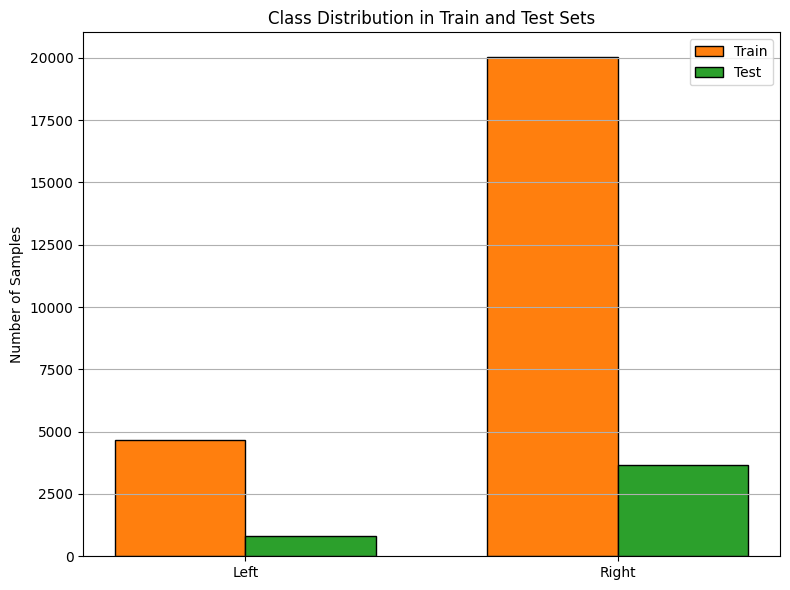

In [14]:
# Class distribution before augmentation
import matplotlib.pyplot as plt

# Map labels to integers (Left=0, Right=1)
y_train = df_train_meta["normalized_label"].map({"Left": 0, "Right": 1}).values
y_test = df_test_meta["normalized_label"].map({"Left": 0, "Right": 1}).values

# Count occurrences
left_train = np.sum(y_train == 0)
right_train = np.sum(y_train == 1)
left_test = np.sum(y_test == 0)
right_test = np.sum(y_test == 1)

# Print counts
print("Training Set:")
print("  Left (0):", left_train)
print("  Right (1):", right_train)

print("\nTest Set:")
print("  Left (0):", left_test)
print("  Right (1):", right_test)

# Plot
labels = ["Left", "Right"]
train_counts = [left_train, right_train]
test_counts = [left_test, right_test]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, train_counts, width, label='Train', color='tab:orange', edgecolor='black')
plt.bar(x + width/2, test_counts, width, label='Test', color='tab:green', edgecolor='black')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Train and Test Sets')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
# Data augmentation
import random

def add_gaussian_noise(ecg, std=0.01):
    noise = np.random.normal(0, std, ecg.shape)
    return ecg + noise

def time_shift(ecg, max_shift=20):
    shift = random.randint(-max_shift, max_shift)
    return np.roll(ecg, shift, axis=0)

def right_side_lead_dropout(ecg):
    right_leads = ['III', 'AVR', 'AVF', 'V1', 'V2', 'V3']
    lead_indices = [i for i, lead in enumerate(['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 
                                                'V1', 'V2', 'V3', 'V4', 'V5', 'V6']) if lead in right_leads]
    ecg_dropout = ecg.copy()
    ecg_dropout[:, lead_indices] = 0
    return ecg_dropout


In [16]:
# Apply data augmentation to left-class in training set
X_train_aug = []
y_train_aug = []

for i, ecg in enumerate(X_train_ecg):
    label = y_train[i]

    # Keep original
    X_train_aug.append(ecg)
    y_train_aug.append(label)

    if label == 0:  # Left-class
        # Gaussian noise
        X_train_aug.append(add_gaussian_noise(ecg))
        y_train_aug.append(0)

        # Time shift
        X_train_aug.append(time_shift(ecg))
        y_train_aug.append(0)

        # Right-side lead dropout
        X_train_aug.append(right_side_lead_dropout(ecg))
        y_train_aug.append(0)

X_train_aug = np.stack(X_train_aug)
y_train_aug = np.array(y_train_aug)

print("\nData augmentation complete.")
print("X_train_aug shape:", X_train_aug.shape)
print("Left (0):", np.sum(y_train_aug == 0))
print("Right (1):", np.sum(y_train_aug == 1))


Data augmentation complete.
X_train_aug shape: (38637, 625, 12)
Left (0): 18616
Right (1): 20021


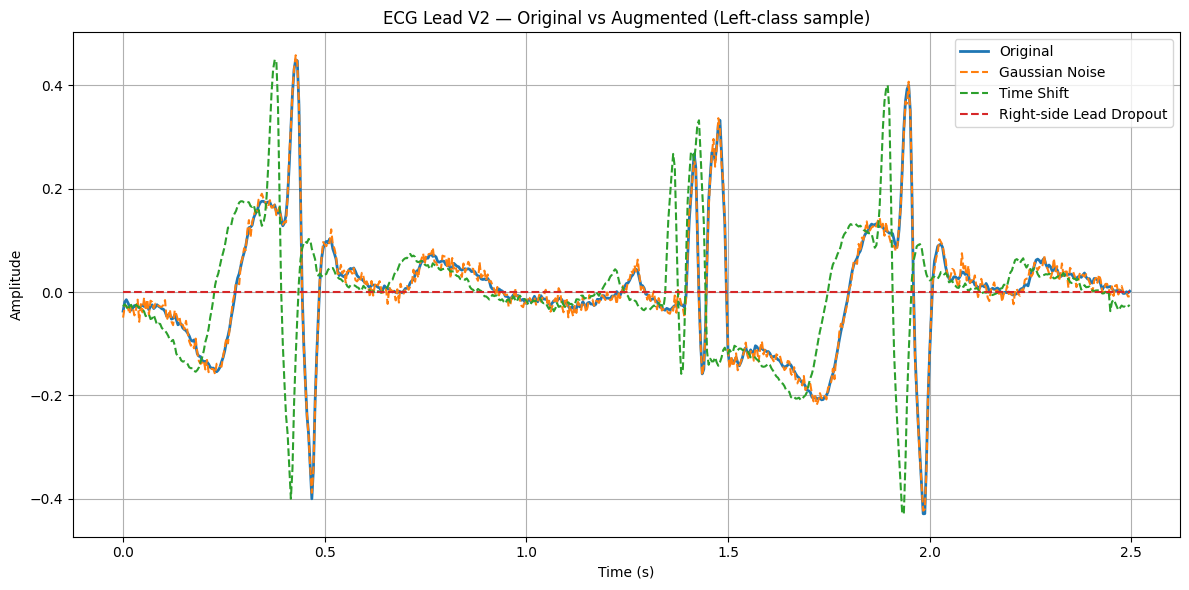

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Sampling frequency and lead info
fs = 250
lead_idx = 7 # Lead V2

# Find index of first Left-class sample in augmented training set (originals are every 4th entry)
for i in range(0, len(y_train_aug), 4):  # Step by 4 (original + 3 augmentations)
    if y_train_aug[i] == 0:
        left_index = i // 4  # This matches how augmentations were appended
        break

# Access the original and 3 augmentations
original = X_train_aug[left_index * 4]
aug1 = X_train_aug[left_index * 4 + 1]
aug2 = X_train_aug[left_index * 4 + 2]
aug3 = X_train_aug[left_index * 4 + 3]

# Time axis
t = np.arange(original.shape[0]) / fs

# Plot Lead V2
plt.figure(figsize=(12, 6))
plt.plot(t, original[:, lead_idx], label="Original", linewidth=2)
plt.plot(t, aug1[:, lead_idx], label="Gaussian Noise", linestyle='--')
plt.plot(t, aug2[:, lead_idx], label="Time Shift", linestyle='--')
plt.plot(t, aug3[:, lead_idx], label="Right-side Lead Dropout", linestyle='--')

plt.title("ECG Lead V2 — Original vs Augmented (Left-class sample)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
import os
# Create folder if it doesn't exist
output_folder = "processed_data_big_dataset"
os.makedirs(output_folder, exist_ok=True)

# Saving the df (metadata) containing signal-level information
with open(f"{output_folder}/df_signals_preprocessed.pkl", "wb") as file:
    pickle.dump(df_signals, file)
    print(f"df_signals saved to {output_folder}/df_signals_preprocessed.pkl")

# Saving the preprocessed ECG signals
with open(f"{output_folder}/preprocessed_ecgs.pkl", "wb") as file:
    pickle.dump(preprocessed_ecgs, file)
    print(f"Preprocessed ECGs saved to {output_folder}/preprocessed_ecgs.pkl")

df_signals saved to processed_data_big_dataset/df_signals_preprocessed.pkl
Preprocessed ECGs saved to processed_data_big_dataset/preprocessed_ecgs.pkl
